In [1]:
import tensorflow as tf

In [2]:
x = tf.placeholder(tf.float32,shape=[None,3])
y_true = tf.placeholder(tf.float32,shape=None)
w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
b = tf.Variable(0,dtype=tf.float32,name='bias')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
y_pred = tf.matmul(w,tf.transpose(x)) + b

In [4]:
loss = tf.reduce_mean(tf.square(y_true-y_pred))

In [6]:
learning_rate=0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

Instructions for updating:
Use tf.cast instead.


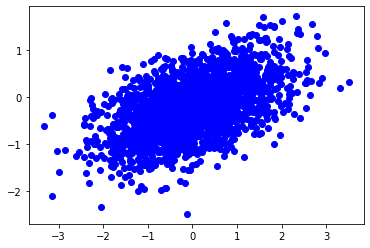

In [31]:
import numpy as np
import matplotlib.pyplot as plt
# === Create data and simulate results ===== 
x_data = np.random.randn(2000,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2
noise = np.random.randn(1,2000)*0.1
y_data = np.matmul(w_real,x_data.T) + b_real + noise
plt.plot(x_data[:,:1],y_data.T,"bo")

In [34]:
NUM_STEPS = 10
g = tf.Graph() 
wb_=[]

with g.as_default():
    x = tf.placeholder(tf.float32,shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights') 
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))

    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
        train = optimizer.minimize(loss)


    init = tf.global_variables_initializer() 
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data}) 
            if(step%5==0):
                print(step, sess.run([w,b])) 
                wb_.append(sess.run([w,b]))
        print(10, sess.run([w,b]))

0 [array([[0.3158498 , 0.5070349 , 0.11284561]], dtype=float32), -0.20994139]
5 [array([[0.3056689 , 0.49974626, 0.10376162]], dtype=float32), -0.19833578]
10 [array([[0.3056689 , 0.49974626, 0.10376164]], dtype=float32), -0.1983358]
